# Data Summary

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline    
sns.set(color_codes=True)

from sklearn.preprocessing import StandardScaler, LabelEncoder #Machine Learning

In [ ]:
df = pd.read_csv('players.csv', delimiter = ",");
#data_df = pd.DataFrame(df)
points = df.values
df.head(10)

,Unnamed: 0,Name,Position,Age,Markey Value In Millions(£),Country,Club,Matches,Goals,Own Goals,Assists,Yellow Cards,Second Yellow Cards,Red Cards,Number Of Substitute In,Number Of Substitute Out
0,0,Kylian Mbappé,Centre-Forward,22,144.0,France,Paris Saint-Germain,16,7,0,11,3,0,0,0,8
1,1,Erling Haaland,Centre-Forward,21,135.0,Norway,Borussia Dortmund,10,13,0,4,1,0,0,0,1
2,2,Harry Kane,Centre-Forward,28,108.0,England,Tottenham Hotspur,16,7,0,2,2,0,0,2,2
3,3,Jack Grealish,Left Winger,26,90.0,England,Manchester City,15,2,0,3,1,0,0,2,8
4,4,Mohamed Salah,Right Winger,29,90.0,Egypt,Liverpool FC,15,15,0,6,1,0,0,0,3
5,5,Romelu Lukaku,Centre-Forward,28,90.0,Belgium,Chelsea FC,11,4,0,1,0,0,0,1,2
6,6,Kevin De Bruyne,Attacking Midfield,30,90.0,Belgium,Manchester City,14,3,0,1,1,0,0,4,6
7,7,Neymar,Left Winger,29,90.0,Brazil,Paris Saint-Germain,11,3,0,3,3,0,0,0,3
8,8,Jadon Sancho,Left Winger,21,81.0,England,Manchester United,13,0,0,0,0,0,0,7,5
9,9,Frenkie de Jong,Central Midfield,24,81.0,Netherlands,FC Barcelona,13,0,0,2,2,1,0,0,2


In [ ]:
df2 = pd.read_csv('players1.csv', delimiter = ",");
points = df2.values
df2.head(10)

,Unnamed: 0,Name,Position,Age,Markey Value In Millions(£),Country,Club,Matches,Goals,Own Goals,Assists,Yellow Cards,Second Yellow Cards,Red Cards,Number Of Substitute In,Number Of Substitute Out
0,0,Kylian Mbappé,Centre-Forward,22,144.0,France,Paris Saint-Germain,16,7,0,11,3,0,0,0,8
1,1,Erling Haaland,Centre-Forward,21,135.0,Norway,Borussia Dortmund,10,13,0,4,1,0,0,0,1
2,2,Harry Kane,Centre-Forward,28,108.0,England,Tottenham Hotspur,16,7,0,2,2,0,0,2,2
3,3,Jack Grealish,Left Winger,26,90.0,England,Manchester City,15,2,0,3,1,0,0,2,8
4,4,Mohamed Salah,Right Winger,29,90.0,Egypt,Liverpool FC,15,15,0,6,1,0,0,0,3
5,5,Romelu Lukaku,Centre-Forward,28,90.0,Belgium,Chelsea FC,11,4,0,1,0,0,0,1,2
6,6,Kevin De Bruyne,Attacking Midfield,30,90.0,Belgium,Manchester City,14,3,0,1,1,0,0,4,6
7,7,Neymar,Left Winger,29,90.0,Brazil,Paris Saint-Germain,11,3,0,3,3,0,0,0,3
8,8,Jadon Sancho,Left Winger,21,81.0,England,Manchester United,13,0,0,0,0,0,0,7,5
9,9,Frenkie de Jong,Central Midfield,24,81.0,Netherlands,FC Barcelona,13,0,0,2,2,1,0,0,2


In [ ]:
df.tail(10)

,Unnamed: 0,Name,Position,Age,Markey Value In Millions(£),Country,Club,Matches,Goals,Own Goals,Assists,Yellow Cards,Second Yellow Cards,Red Cards,Number Of Substitute In,Number Of Substitute Out
490,490,Gregor Kobel,Goalkeeper,23,16.2,Switzerland,Borussia Dortmund,18,0,0,0,0,0,0,0,1
491,491,Wilmar Barrios,Defensive Midfield,28,16.2,Colombia,Zenit St. Petersburg,16,0,0,1,2,0,0,1,4
492,492,Gelson Martins,Right Winger,26,16.2,Portugal,AS Monaco,18,3,0,1,0,0,0,2,16
493,493,Rob Holding,Centre-Back,26,16.2,England,Arsenal FC,5,0,0,0,2,0,0,0,1
494,494,Adam Armstrong,Centre-Forward,24,16.2,England,Southampton FC,11,2,0,2,0,0,0,1,2
495,495,Giorgian de Arrascaeta,Attacking Midfield,27,16.2,Uruguay,Clube de Regatas do Flamengo,0,0,0,0,0,0,0,0,0
496,496,Ayoze Pérez,Second Striker,28,16.2,Spain,Leicester City,8,1,0,3,0,0,1,2,5
497,497,Alex Meret,Goalkeeper,24,16.2,Italy,SSC Napoli,5,0,0,0,0,0,0,0,0
498,498,Duje Caleta-Car,Centre-Back,25,16.2,Croatia,Olympique Marseille,8,0,0,0,2,0,0,0,2
499,499,Aritz Elustondo,Centre-Back,27,16.2,Spain,Real Sociedad,15,3,0,1,4,0,0,1,1


- Tipe Data

In [ ]:
df.dtypes

Unnamed: 0                       int64
Name                            object
Position                        object
Age                              int64
Markey Value In Millions(£)    float64
Country                         object
Club                            object
Matches                          int64
Goals                            int64
Own Goals                        int64
Assists                          int64
Yellow Cards                     int64
Second Yellow Cards              int64
Red Cards                        int64
Number Of Substitute In          int64
Number Of Substitute Out         int64
dtype: object

- Total baris dan fitur

In [ ]:
print("Total", df.shape)
print("Dari code diatas dapat diartikan bahwa data memiliki total 500 baris dan 16 fitur dari data ini.")

Total (500, 16)
Dari code diatas dapat diartikan bahwa data memiliki total 500 baris dan 16 fitur dari data ini.


# Data Descriptive

In [ ]:
df.describe()

,Unnamed: 0,Age,Markey Value In Millions(£),Matches,Goals,Own Goals,Assists,Yellow Cards,Second Yellow Cards,Red Cards,Number Of Substitute In,Number Of Substitute Out
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,249.500000,24.968000,31.537800,12.396000,2.160000,0.030000,1.51200,1.592000,0.036000,0.046000,2.394000,3.744000
std,144.481833,3.165916,17.577697,4.342453,2.880102,0.170758,1.85276,1.445585,0.186477,0.209695,2.517825,3.293046
min,0.000000,16.000000,16.200000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,124.750000,23.000000,19.800000,10.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,249.500000,25.000000,25.200000,13.000000,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,2.000000,3.000000
75%,374.250000,27.000000,36.000000,16.000000,3.000000,0.000000,2.00000,2.000000,0.000000,0.000000,3.250000,6.000000
max,499.000000,36.000000,144.000000,24.000000,23.000000,1.000000,12.00000,7.000000,1.000000,1.000000,13.000000,20.000000


In [ ]:
df.median()

Unnamed: 0                     249.5
Age                             25.0
Markey Value In Millions(£)     25.2
Matches                         13.0
Goals                            1.0
Own Goals                        0.0
Assists                          1.0
Yellow Cards                     1.0
Second Yellow Cards              0.0
Red Cards                        0.0
Number Of Substitute In          2.0
Number Of Substitute Out         3.0
dtype: float64

# Data Preprocessing

## Data Cleaning

- Data Duplikat (menghilangkan data duplikat)

In [ ]:
duplicate_rows = df[df.duplicated()]
print("Data duplikat (Baris, Kolom):", duplicate_rows.shape)

Data duplikat (Baris, Kolom): (0, 16)


Tidak ada data duplikat

- Data NaN / Null (menghilangkan dana NaN / Null

In [ ]:
df.isnull().sum()

Unnamed: 0                     0
Name                           0
Position                       0
Age                            0
Markey Value In Millions(£)    0
Country                        0
Club                           0
Matches                        0
Goals                          0
Own Goals                      0
Assists                        0
Yellow Cards                   0
Second Yellow Cards            0
Red Cards                      0
Number Of Substitute In        0
Number Of Substitute Out       0
dtype: int64

Tidak ada data NaN

## Data Selection

- Drop kolom yang tidak diperlukan

In [ ]:
df = df.drop(columns = {"Unnamed: 0"}, axis = 1)

In [ ]:
df2 = df2.drop(columns = {"Unnamed: 0","Name","Position","Club","Country","Own Goals","Yellow Cards","Second Yellow Cards","Red Cards","Number Of Substitute In","Number Of Substitute Out"}, axis = 1)

In [ ]:
df.shape

(500, 15)

In [ ]:
df.head(5)

,Name,Position,Age,Markey Value In Millions(£),Country,Club,Matches,Goals,Own Goals,Assists,Yellow Cards,Second Yellow Cards,Red Cards,Number Of Substitute In,Number Of Substitute Out
0,Kylian Mbappé,Centre-Forward,22,144.0,France,Paris Saint-Germain,16,7,0,11,3,0,0,0,8
1,Erling Haaland,Centre-Forward,21,135.0,Norway,Borussia Dortmund,10,13,0,4,1,0,0,0,1
2,Harry Kane,Centre-Forward,28,108.0,England,Tottenham Hotspur,16,7,0,2,2,0,0,2,2
3,Jack Grealish,Left Winger,26,90.0,England,Manchester City,15,2,0,3,1,0,0,2,8
4,Mohamed Salah,Right Winger,29,90.0,Egypt,Liverpool FC,15,15,0,6,1,0,0,0,3


## Data Integration

- Mengganti nama kolom karna typo

In [ ]:
df= df.rename(columns = {
    "Markey Value In Millions(£)": "Market Value In Millions(£)",
   
})

df.head(5)

,Name,Position,Age,Market Value In Millions(£),Country,Club,Matches,Goals,Own Goals,Assists,Yellow Cards,Second Yellow Cards,Red Cards,Number Of Substitute In,Number Of Substitute Out
0,Kylian Mbappé,Centre-Forward,22,144.0,France,Paris Saint-Germain,16,7,0,11,3,0,0,0,8
1,Erling Haaland,Centre-Forward,21,135.0,Norway,Borussia Dortmund,10,13,0,4,1,0,0,0,1
2,Harry Kane,Centre-Forward,28,108.0,England,Tottenham Hotspur,16,7,0,2,2,0,0,2,2
3,Jack Grealish,Left Winger,26,90.0,England,Manchester City,15,2,0,3,1,0,0,2,8
4,Mohamed Salah,Right Winger,29,90.0,Egypt,Liverpool FC,15,15,0,6,1,0,0,0,3


In [ ]:
df2= df2.rename(columns = {
    "Markey Value In Millions(£)": "Market Value In Millions(£)",
   
})

df2.head(5)

,Age,Market Value In Millions(£),Matches,Goals,Assists
0,22,144.0,16,7,11
1,21,135.0,10,13,4
2,28,108.0,16,7,2
3,26,90.0,15,2,3
4,29,90.0,15,15,6


# Data Visualization

In [ ]:
# Define Function

def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

## Line Plot

### Pengaruh Matches dengan Gol yang tercipta

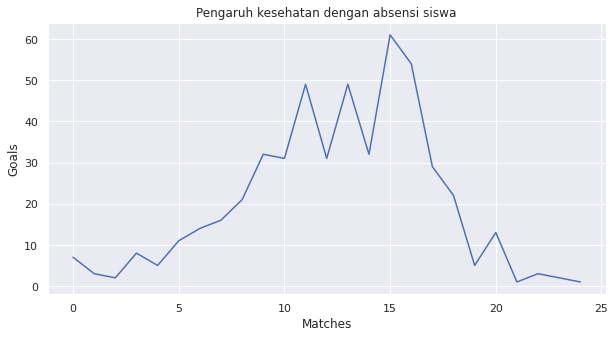

In [ ]:
dataline1 = df["Matches"].unique()
data = []

for c in dataline1:
    d = df[df["Matches"] == c]
    counts = d["Goals"].count()
    data.append([c, counts])

data = pd.DataFrame(data, columns = ["Matches", "Goals"])
plt.figure(figsize=(10,5))
plt.title("Pengaruh kesehatan dengan absensi siswa")
ax = sns.lineplot(x="Matches", y="Goals", data=data)

## Histogram

In [ ]:
df.head()

,Name,Position,Age,Market Value In Millions(£),Country,Club,Matches,Goals,Own Goals,Assists,Yellow Cards,Second Yellow Cards,Red Cards,Number Of Substitute In,Number Of Substitute Out
0,Kylian Mbappé,Centre-Forward,22,144.0,France,Paris Saint-Germain,16,7,0,11,3,0,0,0,8
1,Erling Haaland,Centre-Forward,21,135.0,Norway,Borussia Dortmund,10,13,0,4,1,0,0,0,1
2,Harry Kane,Centre-Forward,28,108.0,England,Tottenham Hotspur,16,7,0,2,2,0,0,2,2
3,Jack Grealish,Left Winger,26,90.0,England,Manchester City,15,2,0,3,1,0,0,2,8
4,Mohamed Salah,Right Winger,29,90.0,Egypt,Liverpool FC,15,15,0,6,1,0,0,0,3



### Jumlah pemain sepak bola berdasarkan umur.





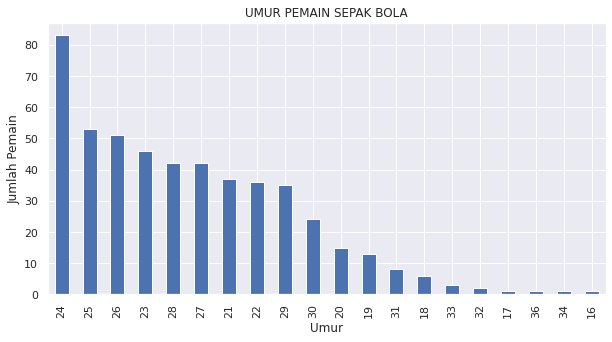

In [ ]:
df.Age.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("UMUR PEMAIN SEPAK BOLA")
plt.xlabel('Umur')
plt.ylabel('Jumlah Pemain');

Kesimpulan : Pada Histogram di atas total terbanyak Pemain sepak bola yaitu di umur 24 tahun yang berjumlah ± 80 orang, dan yang paling sedikit ada di umur 17, 36, 34 dan 16 tahun yang berjumlah kurang dari 10 orang.



### Total club sepakbola berdasarkan Negara


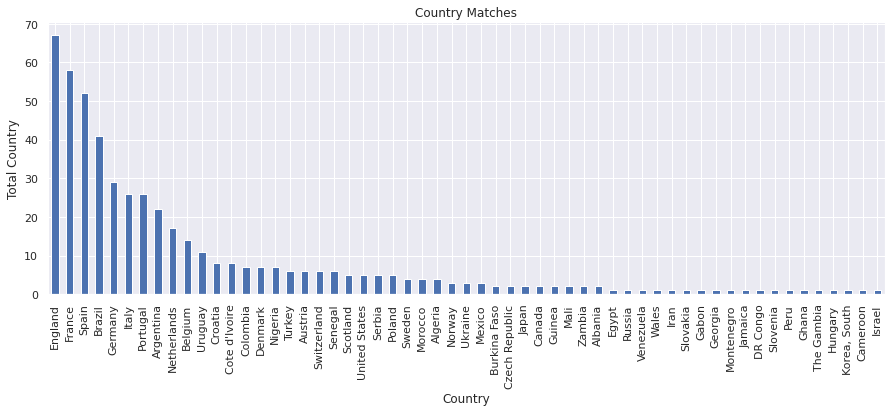

In [ ]:
df.Country.value_counts().plot(kind='bar', figsize=(15,5))
plt.title("Country Matches")
plt.xlabel('Country')
plt.ylabel('Total Country');

Kesimpulan : Dapat disimpulkan bahwa dari banyaknya klub sepakbola yang ada diseluruh dunia sebagian besar berasal dari England (Inggris), diikuti Perancis, Spanyol, Brazil, dll



### Jumlah pemain sepak bola yang mencetak goals


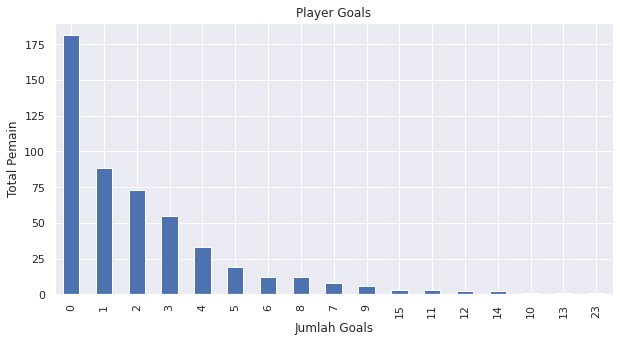

In [ ]:
df.Goals.value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Player Goals")
plt.xlabel('Jumlah Goals')
plt.ylabel('Total Pemain');

Kesimpulan : Berdasarkan Histogram di atas dapat disimpulkan ada bahwa terdapat lebih dari 175 pemain sepak bola yang belum pernah mencetak goal dan ada 14 goals yang berhasil di cetak oleh kurang dari 25 pemain sepak bola.


### Total pemain sepak bola yang melakukan Assists

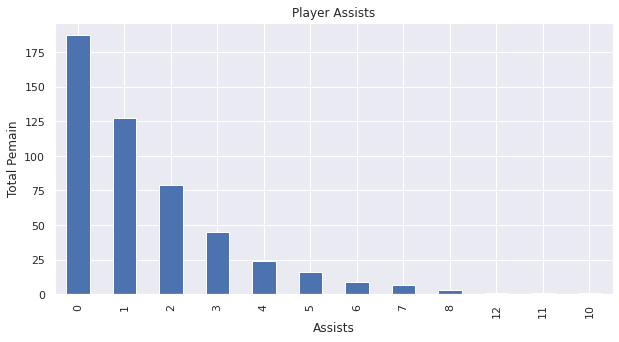

In [ ]:
df.Assists.value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Player Assists")
plt.xlabel('Assists')
plt.ylabel('Total Pemain');

### Jumlah pemain berdasarkan jumlah matches

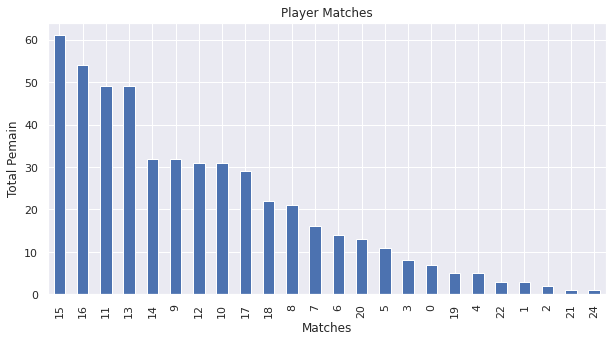

In [ ]:
df.Matches.value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Player Matches")
plt.xlabel('Matches')
plt.ylabel('Total Pemain');

Kesimpulan : Pada Histogram di atas ada ± 175 pemain yang tidak membantu pemain lainnya untuk mencetak goal, dan kurang dari 25 pemain yang membantu pemain lainnya mencetak gol sebanyak 8 kali.


## Scatter Plot

In [ ]:
df.head()

,Name,Position,Age,Market Value In Millions(£),Country,Club,Matches,Goals,Own Goals,Assists,Yellow Cards,Second Yellow Cards,Red Cards,Number Of Substitute In,Number Of Substitute Out
0,Kylian Mbappé,Centre-Forward,22,144.0,France,Paris Saint-Germain,16,7,0,11,3,0,0,0,8
1,Erling Haaland,Centre-Forward,21,135.0,Norway,Borussia Dortmund,10,13,0,4,1,0,0,0,1
2,Harry Kane,Centre-Forward,28,108.0,England,Tottenham Hotspur,16,7,0,2,2,0,0,2,2
3,Jack Grealish,Left Winger,26,90.0,England,Manchester City,15,2,0,3,1,0,0,2,8
4,Mohamed Salah,Right Winger,29,90.0,Egypt,Liverpool FC,15,15,0,6,1,0,0,0,3


### Persebaran data Market Value dan Goals yang dicetak

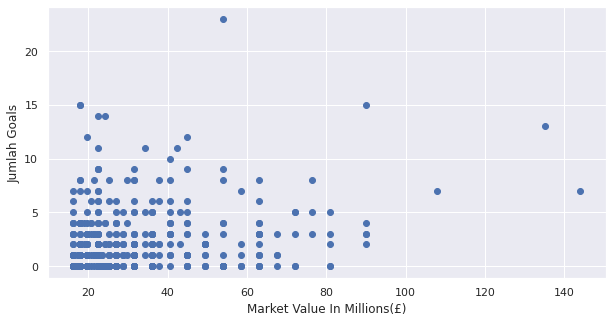

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(df['Market Value In Millions(£)'], df['Goals'])
ax.set_xlabel('Market Value In Millions(£)')
ax.set_ylabel('Jumlah Goals')
plt.show()

## Bar Chart

In [ ]:
df.head()

,Name,Position,Age,Market Value In Millions(£),Country,Club,Matches,Goals,Own Goals,Assists,Yellow Cards,Second Yellow Cards,Red Cards,Number Of Substitute In,Number Of Substitute Out
0,Kylian Mbappé,Centre-Forward,22,144.0,France,Paris Saint-Germain,16,7,0,11,3,0,0,0,8
1,Erling Haaland,Centre-Forward,21,135.0,Norway,Borussia Dortmund,10,13,0,4,1,0,0,0,1
2,Harry Kane,Centre-Forward,28,108.0,England,Tottenham Hotspur,16,7,0,2,2,0,0,2,2
3,Jack Grealish,Left Winger,26,90.0,England,Manchester City,15,2,0,3,1,0,0,2,8
4,Mohamed Salah,Right Winger,29,90.0,Egypt,Liverpool FC,15,15,0,6,1,0,0,0,3


### Pengaruh posisi pemain dalam mencetak goals

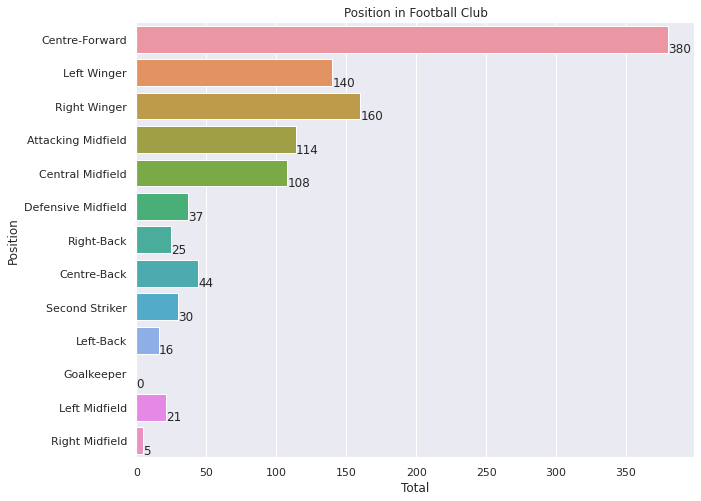

In [ ]:
data = []

dataPosition = df["Position"].unique()
for c in dataPosition:
    d = df[df["Position"] == c]
    sum = d["Goals"].sum()
    data.append([c, sum])

data = pd.DataFrame(data, columns = ["Position", "Total"])
get = data.head(20);

plt.figure(figsize=(10,8))
plt.title("Position in Football Club")

ax = sns.barplot(x="Total", y="Position", data=get)

show_values_on_bars(ax, "h", 0.10)
        

Kesimpulan : Posisi seorang pemain sepakbola menentukan jumlah goals yang dihasilkan, dari data diatas posisi 'Center Forward' memiliki jumlah goal terbanyak dibanding posisi lain. Hasil diatas menggunakan 20 data teratas. 

### Jumlah club sepakbola per-Negara

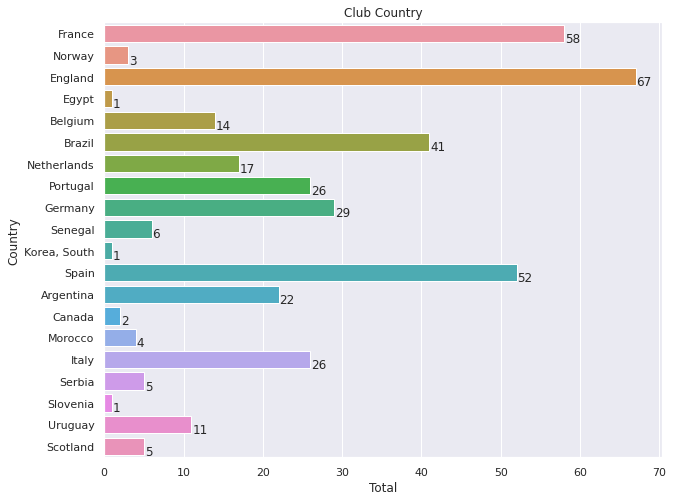

In [ ]:
data = []

dataCountry = df["Country"].unique()
for c in dataCountry:
    d = df[df["Country"] == c]
    count = d["Name"].count()
    data.append([c, count])

data = pd.DataFrame(data, columns = ["Country", "Total"])
get = data.head(20);

plt.figure(figsize=(10,8))
plt.title("Club Country")

ax = sns.barplot(x="Total", y="Country", data=get)
        
show_values_on_bars(ax, "h", 0.10)

### Akumulasi market value pemain sepakbola per-Negara (dalam juta pound sterling)

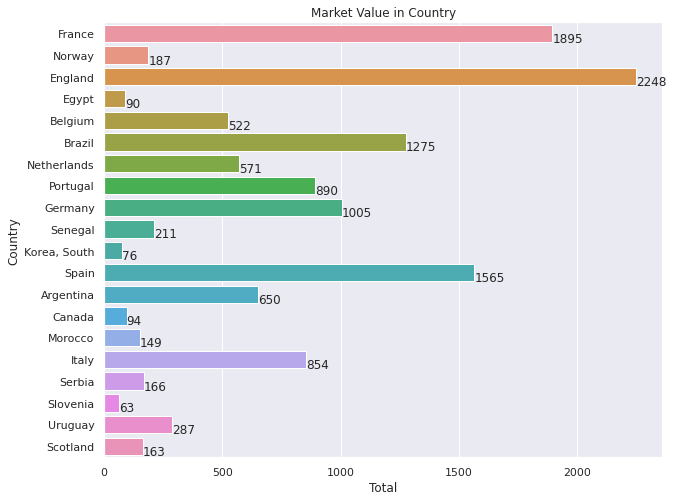

In [ ]:
data = []

dataCountry = df["Country"].unique()
for c in dataCountry:
    d = df[df["Country"] == c]
    count = d["Market Value In Millions(£)"].sum()
    data.append([c, count])

data = pd.DataFrame(data, columns = ["Country", "Total"])
get = data.head(20);

plt.figure(figsize=(10,8))
plt.title("Market Value in Country")

ax = sns.barplot(x="Total", y="Country", data=get)
        
show_values_on_bars(ax, "h", 0.10)

### Rata-rata Market Value pemain sepakbola per-Negara

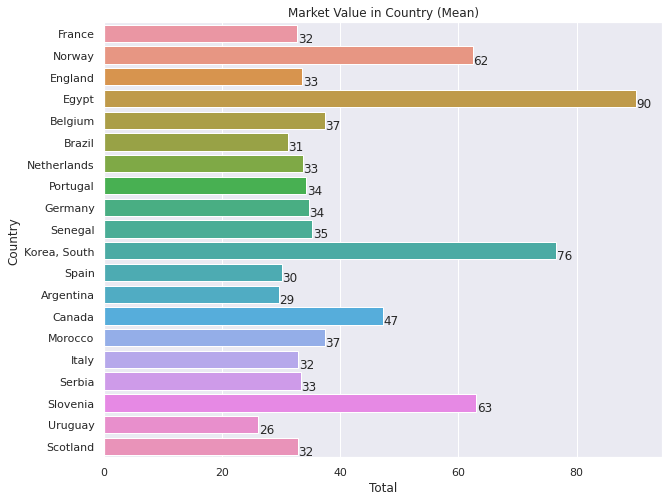

In [ ]:
data = []

dataCountry = df["Country"].unique()
for c in dataCountry:
    d = df[df["Country"] == c]
    count = d["Market Value In Millions(£)"].mean()
    data.append([c, count])

data = pd.DataFrame(data, columns = ["Country", "Total"])
get = data.head(20);

plt.figure(figsize=(10,8))
plt.title("Market Value in Country (Mean)")

ax = sns.barplot(x="Total", y="Country", data=get)
        
show_values_on_bars(ax, "h", 0.10)

Kesimpulan : Data diatas menggambarkan asal negara klub sepakbola, disimpulkan bahwa rata-rata klub sepak bola berasal dari Negara 'England'

### Gambaran keuangan pada setiap klub sepakbola di seluruh dunia

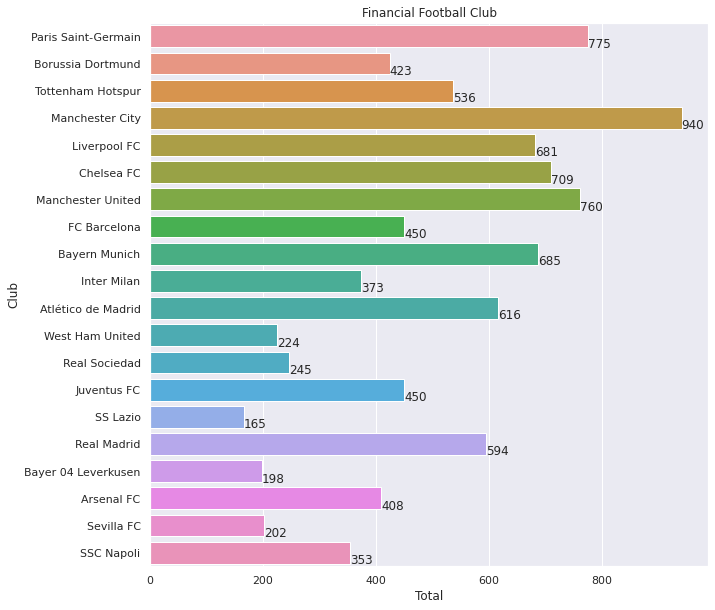

In [ ]:
data = []

dataClub = df["Club"].unique()
for c in dataClub:
    d = df[df["Club"] == c]
    sum = d["Market Value In Millions(£)"].sum()
    data.append([c, sum])

data = pd.DataFrame(data, columns = ["Club", "Total"])
get = data.head(20);

plt.figure(figsize=(10,10))
plt.title("Financial Football Club")

ax = sns.barplot(x="Total", y="Club", data=get)
        
show_values_on_bars(ax, "h", 0.10)

Kesimpulan : Market value dapat menjadi gambaran keuangan suatu klub,pada 20 data teratas Football Club dapat disimpulkan klub mana yang memiliki keuangan tertinggi. Hal ini dipengaruhi oleh Market Value para pemain yang dimiliki, semakin tinggi Market Valuenya semakin tinggi juga tingkat keuangan suatu klub sepakbola

### Rata-rata Market Value untuk masing-masing posisi (dalam juta pound sterling)

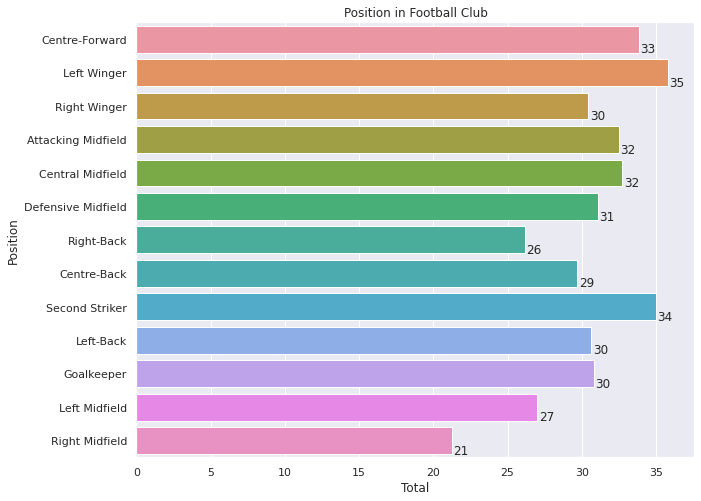

In [ ]:
data = []

dataPosition = df["Position"].unique()
for c in dataPosition:
    d = df[df["Position"] == c]
    sum = d["Market Value In Millions(£)"].mean()
    data.append([c, sum])

data = pd.DataFrame(data, columns = ["Position", "Total"])
get = data.head(20);

plt.figure(figsize=(10,8))
plt.title("Position in Football Club")

ax = sns.barplot(x="Total", y="Position", data=get)

show_values_on_bars(ax, "h", 0.10)
        

### Jumlah pemain pada setiap posisi (akumulasi dari 500 pemain)

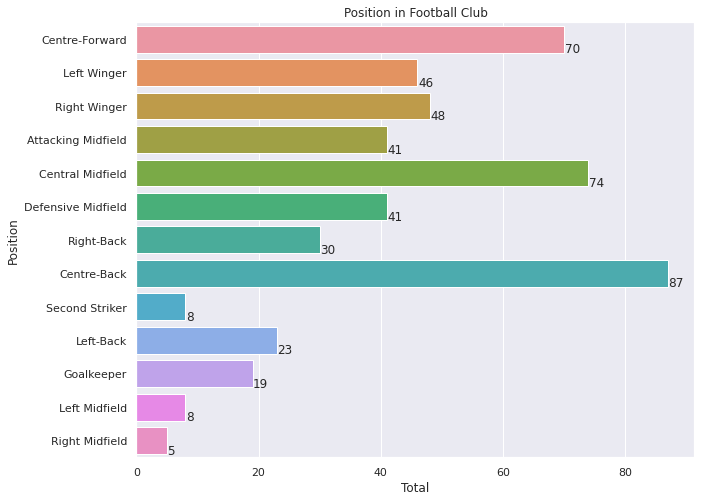

In [ ]:
data = []

dataPosition = df["Position"].unique()
for c in dataPosition:
    d = df[df["Position"] == c]
    count = d["Position"].count()
    data.append([c, count])

data = pd.DataFrame(data, columns = ["Position", "Total"])
get = data.head(20);

plt.figure(figsize=(10,8))
plt.title("Position in Football Club")

ax = sns.barplot(x="Total", y="Position", data=get)

show_values_on_bars(ax, "h", 0.10)

### Perbandingan Pemain yang mendapat *Red cards*

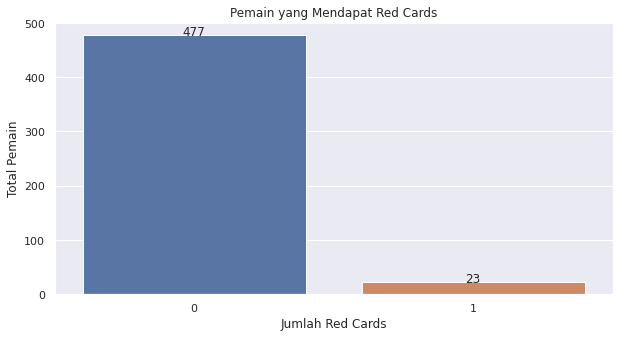

In [ ]:
datatype = df["Red Cards"].unique()
data = []

for c in datatype:
    d = df[df["Red Cards"] == c]
    Sum = d["Name"].count()
    data.append([c, Sum])
    
dt = pd.DataFrame(data, columns = ["Jumlah Red Cards", "Total Pemain"])

plt.figure(figsize=(10,5))
plt.title("Pemain yang Mendapat Red Cards")

ax = sns.barplot(x="Jumlah Red Cards", y="Total Pemain", data=dt)
        
show_values_on_bars(ax, "v", 0.10)

### Perbandingan Pemain yang mencetak Goal bunuh diri

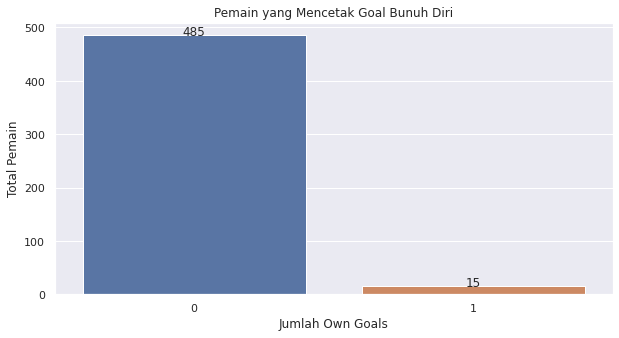

In [ ]:
datatype = df["Own Goals"].unique()
data = []

for c in datatype:
    d = df[df["Own Goals"] == c]
    Sum = d["Name"].count()
    data.append([c, Sum])
    
dt = pd.DataFrame(data, columns = ["Jumlah Own Goals", "Total Pemain"])

plt.figure(figsize=(10,5))
plt.title("Pemain yang Mencetak Goal Bunuh Diri")

ax = sns.barplot(x="Jumlah Own Goals", y="Total Pemain", data=dt)
        
show_values_on_bars(ax, "v", 0.10)

### Jumlah pemain yang mendapat yellow cards

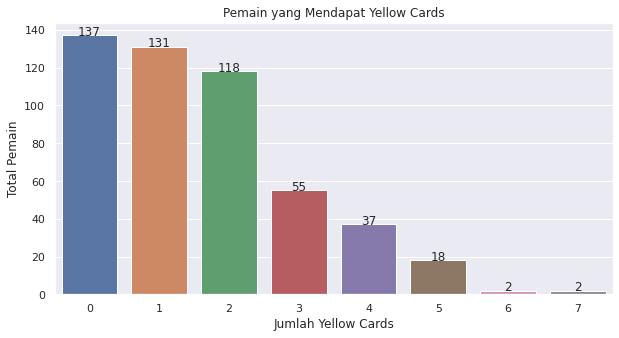

In [ ]:
datatype = df["Yellow Cards"].unique()
data = []

for c in datatype:
    d = df[df["Yellow Cards"] == c]
    Sum = d["Name"].count()
    data.append([c, Sum])
    
dt = pd.DataFrame(data, columns = ["Jumlah Yellow Cards", "Total Pemain"])

plt.figure(figsize=(10,5))
plt.title("Pemain yang Mendapat Yellow Cards")

ax = sns.barplot(x="Jumlah Yellow Cards", y="Total Pemain", data=dt)
        
show_values_on_bars(ax, "v", 0.10)

### Jumlah pemain yang mendapat Second Yellow Cards

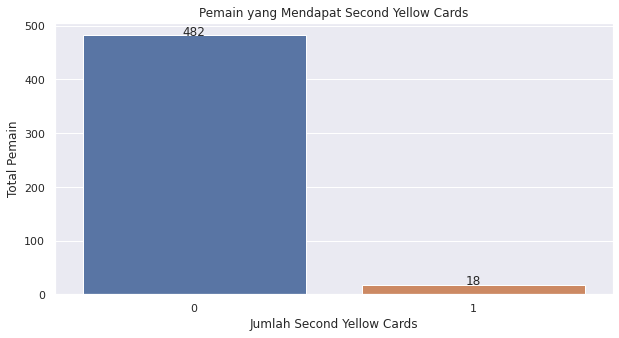

In [ ]:
datatype = df["Second Yellow Cards"].unique()
data = []

for c in datatype:
    d = df[df["Second Yellow Cards"] == c]
    Sum = d["Name"].count()
    data.append([c, Sum])
    
dt = pd.DataFrame(data, columns = ["Jumlah Second Yellow Cards", "Total Pemain"])

plt.figure(figsize=(10,5))
plt.title("Pemain yang Mendapat Second Yellow Cards")

ax = sns.barplot(x="Jumlah Second Yellow Cards", y="Total Pemain", data=dt)
        
show_values_on_bars(ax, "v", 0.10)

## Box Plot

### Box Plot Age

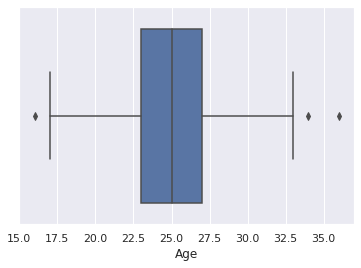

In [ ]:
sns.boxplot(x=df['Age'])

In [ ]:
# Outliers Detection

Q1 = df["Age"].quantile(0.25)
Q3 = df["Age"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

print("Batas Bawah = ", lower_bound)
print("Batas Atas = ", upper_bound)
print("Jadi apapun yang berada diluar", lower_bound, " dan", upper_bound, " merupakan Outlier")

Batas Bawah =  17.0
Batas Atas =  33.0
Jadi apapun yang berada diluar 17.0  dan 33.0  merupakan Outlier


Pada fitur Age terdapat 3 data outliers, yakni umur 16 tahun, 34 tahun, dan 36 tahun.

### Box Plot Market Value In Millions (£)

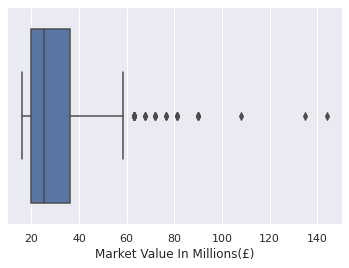

In [ ]:
sns.boxplot(x=df['Market Value In Millions(£)'])

In [ ]:
# Outliers Detection

Q1 = df["Market Value In Millions(£)"].quantile(0.25)
Q3 = df["Market Value In Millions(£)"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

print("Batas Bawah = ", lower_bound)
print("Batas Atas = ", upper_bound)
print("Jadi apapun yang berada diluar", lower_bound, " dan", upper_bound, " merupakan Outlier")

Batas Bawah =  -4.4999999999999964
Batas Atas =  60.3
Jadi apapun yang berada diluar -4.4999999999999964  dan 60.3  merupakan Outlier


Pada fitur Market Value In Millions(£) terdapat 9 data outliers, yakni 62, 67, 71, 75, 81, 90, 108, 138, dan 142 Millions(£).

### Box Plot Matches

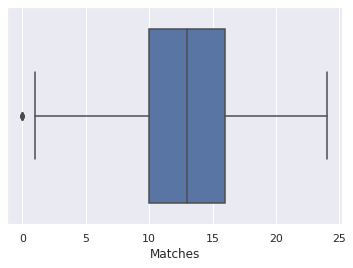

In [ ]:
sns.boxplot(x=df['Matches'])

In [ ]:
# Outliers Detection

Q1 = df["Matches"].quantile(0.25)
Q3 = df["Matches"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

print("Batas Bawah = ", lower_bound)
print("Batas Atas = ", upper_bound)
print("Jadi apapun yang berada diluar", lower_bound, " dan", upper_bound, " merupakan Outlier")

Batas Bawah =  1.0
Batas Atas =  25.0
Jadi apapun yang berada diluar 1.0  dan 25.0  merupakan Outlier


Pada fitur Matches ini terdapat 1 data outliers, yaitu 0 Matches.

### Box Plot Goals

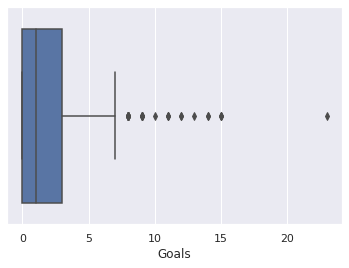

In [ ]:
sns.boxplot(x=df['Goals'])

In [ ]:
# Outliers Detection

Q1 = df["Goals"].quantile(0.25)
Q3 = df["Goals"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

print("Batas Bawah = ", lower_bound)
print("Batas Atas = ", upper_bound)
print("Jadi apapun yang berada diluar", lower_bound, " dan", upper_bound, " merupakan Outlier")

Batas Bawah =  -4.5
Batas Atas =  7.5
Jadi apapun yang berada diluar -4.5  dan 7.5  merupakan Outlier


Pada fitur Goals ini terdapat 9 data outliers, yaitu 8, 9, 10, 11, 12, 13, 14, 15 dan 24 goals.

### Box Plot Own Goals

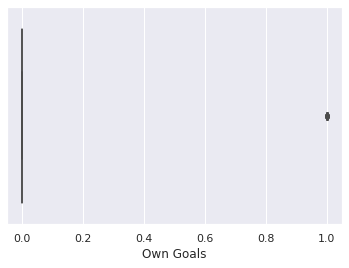

In [ ]:
sns.boxplot(x=df['Own Goals'])

In [ ]:
# Outliers Detection

Q1 = df["Own Goals"].quantile(0.25)
Q3 = df["Own Goals"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

print("Batas Bawah = ", lower_bound)
print("Batas Atas = ", upper_bound)
print("Jadi apapun yang berada diluar", lower_bound, " dan", upper_bound, " merupakan Outlier")

Batas Bawah =  0.0
Batas Atas =  0.0
Jadi apapun yang berada diluar 0.0  dan 0.0  merupakan Outlier


Pada fitur Own Goals ini terdapat 1 data outliers, yaitu 1.0 yang berarti hanya 1 kali own goals.

### Box Plot Assists

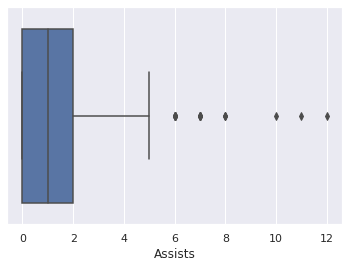

In [ ]:
sns.boxplot(x=df['Assists'])

In [ ]:
# Outliers Detection

Q1 = df["Assists"].quantile(0.25)
Q3 = df["Assists"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

print("Batas Bawah = ", lower_bound)
print("Batas Atas = ", upper_bound)
print("Jadi apapun yang berada diluar", lower_bound, " dan", upper_bound, " merupakan Outlier")

Batas Bawah =  -3.0
Batas Atas =  5.0
Jadi apapun yang berada diluar -3.0  dan 5.0  merupakan Outlier


Pada fitur Assists ini terdapat 6 data outliers, yaitu 6, 7, 8, 10, 11, 12.

### Box Plot Yellow Cards

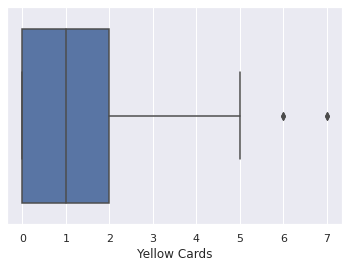

In [ ]:
sns.boxplot(x=df['Yellow Cards'])

In [ ]:
# Outliers Detection

Q1 = df["Yellow Cards"].quantile(0.25)
Q3 = df["Yellow Cards"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

print("Batas Bawah = ", lower_bound)
print("Batas Atas = ", upper_bound)
print("Jadi apapun yang berada diluar", lower_bound, " dan", upper_bound, " merupakan Outlier")

Batas Bawah =  -3.0
Batas Atas =  5.0
Jadi apapun yang berada diluar -3.0  dan 5.0  merupakan Outlier


Pada fitur Yellow Cards ini terdapat 2 data outliers, yaitu 6 dan 7 Yellow Cards.

### Box Plot Second Yellow Cards

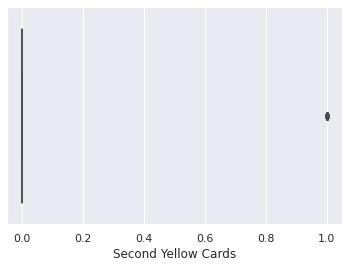

In [ ]:
sns.boxplot(x=df['Second Yellow Cards'])

In [ ]:
# Outliers Detection

Q1 = df["Second Yellow Cards"].quantile(0.25)
Q3 = df["Second Yellow Cards"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

print("Batas Bawah = ", lower_bound)
print("Batas Atas = ", upper_bound)
print("Jadi apapun yang berada diluar", lower_bound, " dan", upper_bound, " merupakan Outlier")

Batas Bawah =  0.0
Batas Atas =  0.0
Jadi apapun yang berada diluar 0.0  dan 0.0  merupakan Outlier


Pada fitur Second Yellow Cards ini terdapat 1 data outliers, yaitu 1.0 yang berarti hanya 1 kali mendapat Second Yellow Cards.

### Box Plot Red Cards

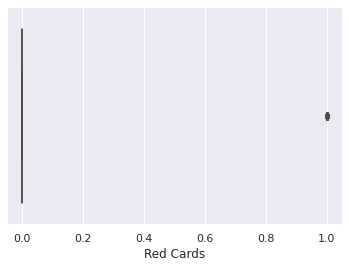

In [ ]:
sns.boxplot(x=df['Red Cards'])

In [ ]:
# Outliers Detection

Q1 = df["Red Cards"].quantile(0.25)
Q3 = df["Red Cards"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

print("Batas Bawah = ", lower_bound)
print("Batas Atas = ", upper_bound)
print("Jadi apapun yang berada diluar", lower_bound, " dan", upper_bound, " merupakan Outlier")

Batas Bawah =  0.0
Batas Atas =  0.0
Jadi apapun yang berada diluar 0.0  dan 0.0  merupakan Outlier


Pada fitur Red Cards ini terdapat 1 data outliers, yaitu 1.0 yang berarti hanya 1 kali mendapat Red Cards.

### Box Plot Number Of Subtitute In

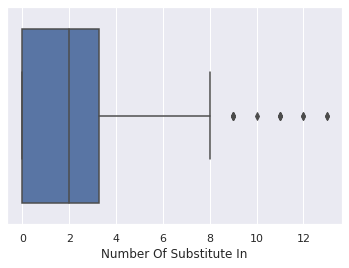

In [ ]:
sns.boxplot(x=df['Number Of Substitute In'])

In [ ]:
# Outliers Detection

Q1 = df["Number Of Substitute In"].quantile(0.25)
Q3 = df["Number Of Substitute In"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

print("Batas Bawah = ", lower_bound)
print("Batas Atas = ", upper_bound)
print("Jadi apapun yang berada diluar", lower_bound, " dan", upper_bound, " merupakan Outlier")

Batas Bawah =  -4.875
Batas Atas =  8.125
Jadi apapun yang berada diluar -4.875  dan 8.125  merupakan Outlier


Pada fitur Number Of Substitute In ini terdapat 5 data outliers, yaitu 9, 10, 11, 12, 13.

### Box Plot Number Of Subtitute Out

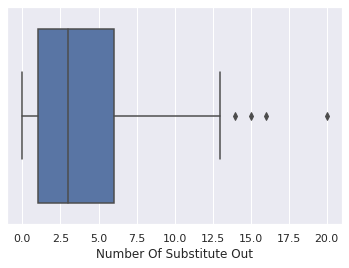

In [ ]:
sns.boxplot(x=df['Number Of Substitute Out'])

In [ ]:
# Outliers Detection

Q1 = df["Number Of Substitute Out"].quantile(0.25)
Q3 = df["Number Of Substitute Out"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

print("Batas Bawah = ", lower_bound)
print("Batas Atas = ", upper_bound)
print("Jadi apapun yang berada diluar", lower_bound, " dan", upper_bound, " merupakan Outlier")

Batas Bawah =  -6.5
Batas Atas =  13.5
Jadi apapun yang berada diluar -6.5  dan 13.5  merupakan Outlier


Pada fitur Number Of Substitute Out ini terdapat 4 data outliers, yaitu 14, 15, 16, 20.

## Pie Chart

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


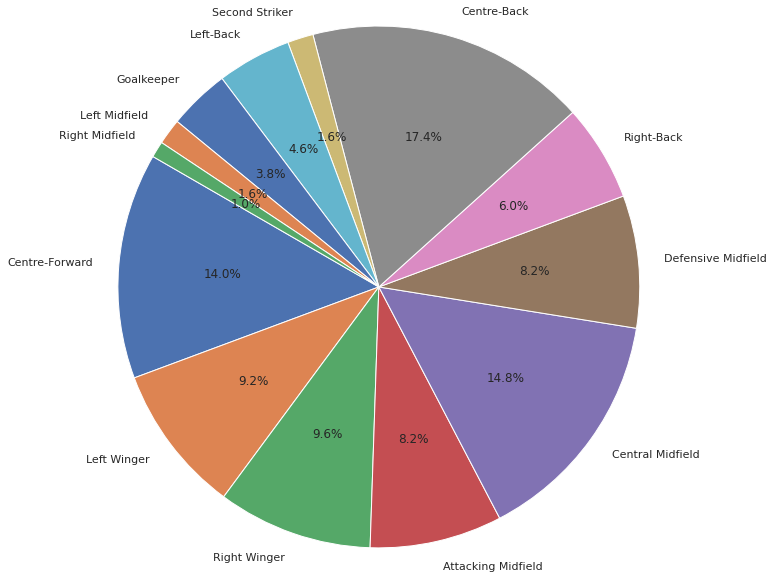

In [ ]:
dataPosition = df["Position"].unique()
data = [];

for s in dataPosition:
    tpr = df["Position"].str.count(s).sum()
    data.append([s, tpr])

data = pd.DataFrame(data, columns = ["Position", "Total"]) 

value = data["Total"]
labels = data["Position"]
plt.pie(value, labels = labels, autopct = "%1.1f%%", radius=3, startangle=150)
plt.axes().set_aspect("equal")
plt.show()

## Violin Plot

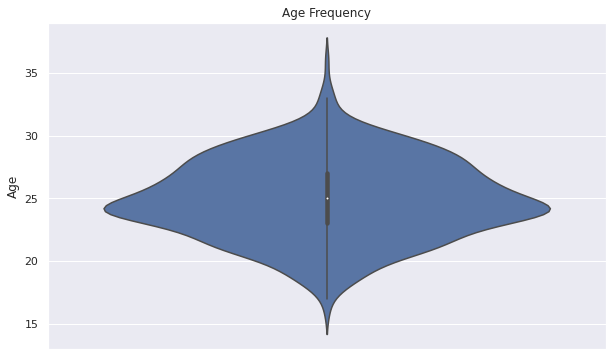

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Age Frequency")
sns.axes_style("dark")
sns.violinplot(y=df["Age"])
plt.show()

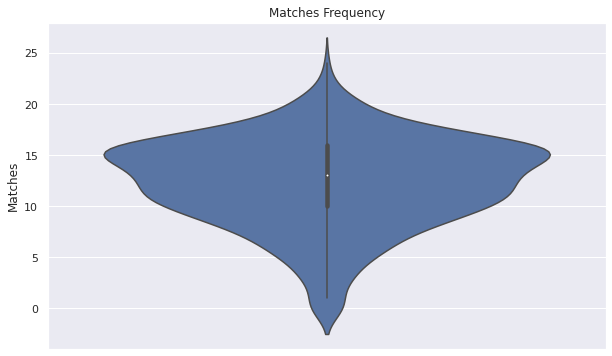

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Matches Frequency")
sns.axes_style("dark")
sns.violinplot(y=df["Matches"])
plt.show()

# Heat Map

,Age,Market Value In Millions(£),Matches,Goals,Own Goals,Assists,Yellow Cards,Second Yellow Cards,Red Cards,Number Of Substitute In,Number Of Substitute Out
Age,1.000000,0.047794,-0.029396,0.056607,0.038849,-0.041616,-0.059783,-0.055751,-0.012872,-0.135682,-0.110354
Market Value In Millions(£),0.047794,1.000000,0.112774,0.213461,-0.032827,0.228183,0.003802,0.041953,0.001485,-0.085958,0.000946
Matches,-0.029396,0.112774,1.000000,0.368270,0.037999,0.407905,0.409519,-0.000317,0.019569,0.224711,0.477138
Goals,0.056607,0.213461,0.368270,1.000000,-0.091276,0.472086,0.024856,-0.055523,-0.022166,0.084144,0.437487
Own Goals,0.038849,-0.032827,0.037999,-0.091276,1.000000,-0.092988,0.057804,-0.033985,-0.038617,-0.041531,-0.096794
Assists,-0.041616,0.228183,0.407905,0.472086,-0.092988,1.000000,0.133521,-0.041855,0.001155,0.083829,0.452794
Yellow Cards,-0.059783,0.003802,0.409519,0.024856,0.057804,0.133521,1.000000,0.076899,0.088482,-0.065864,0.133355
Second Yellow Cards,-0.055751,0.041953,-0.000317,-0.055523,-0.033985,-0.041855,0.076899,1.000000,0.060064,-0.077221,-0.066548
Red Cards,-0.012872,0.001485,0.019569,-0.022166,-0.038617,0.001155,0.088482,0.060064,1.000000,-0.030601,-0.006129
Number Of Substitute In,-0.135682,-0.085958,0.224711,0.084144,-0.041531,0.083829,-0.065864,-0.077221,-0.030601,1.000000,0.247122


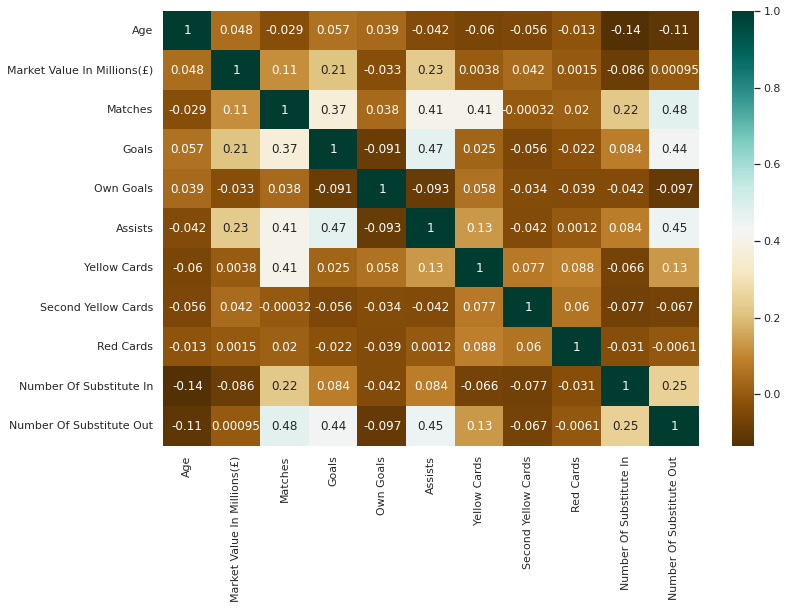

In [ ]:
plt.figure(figsize=(12,8))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

- Menentukan hubungan korelasi antar fitur

# KNN

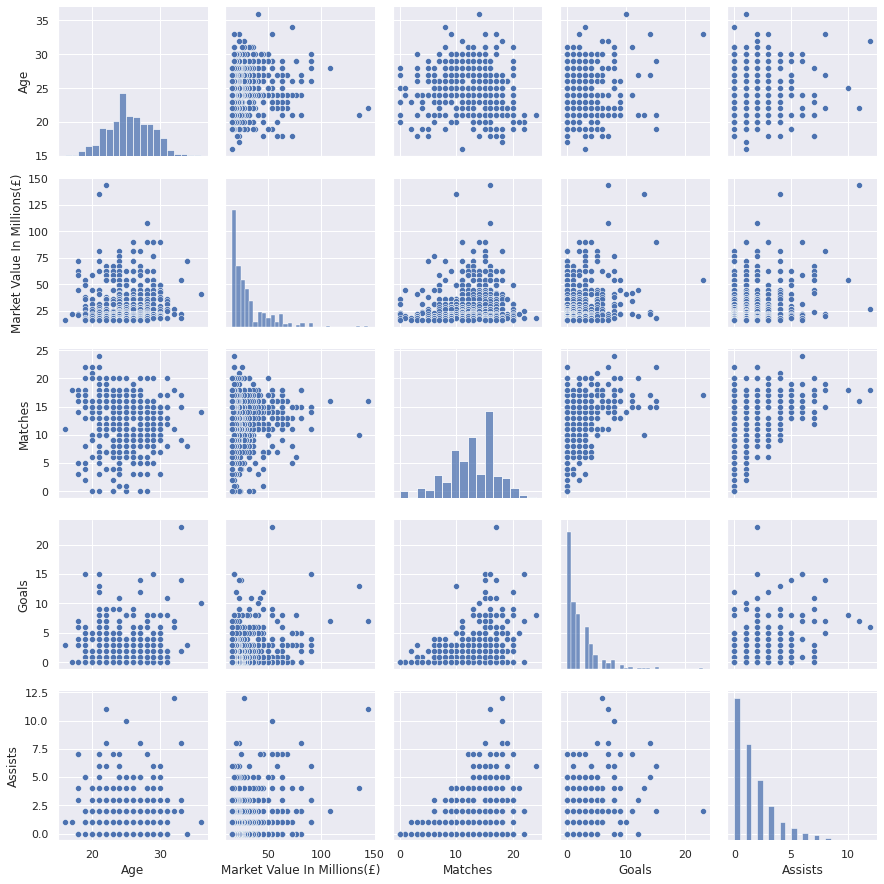

In [ ]:
sns.pairplot(df2)

In [ ]:
scaler = StandardScaler()
df2 = pd.DataFrame(scaler.fit_transform(df2), columns = df2.columns)
df2.head()

,Age,Market Value In Millions(£),Matches,Goals,Assists
0,-0.938424,6.404413,0.830777,1.682179,5.126136
1,-1.254605,5.891888,-0.552314,3.767524,1.344206
2,0.958660,4.354312,0.830777,1.682179,0.263655
3,0.326299,3.329262,0.600262,-0.055609,0.803930
4,1.274841,3.329262,0.600262,4.462640,2.424757


# Data Summary Pendukung

In [ ]:
df[df["Market Value In Millions(£)"] == df["Market Value In Millions(£)"].max()]

,Name,Position,Age,Market Value In Millions(£),Country,Club,Matches,Goals,Own Goals,Assists,Yellow Cards,Second Yellow Cards,Red Cards,Number Of Substitute In,Number Of Substitute Out
0,Kylian Mbappé,Centre-Forward,22,144.0,France,Paris Saint-Germain,16,7,0,11,3,0,0,0,8


Disini bisa disimpulkan, bahwa pemain yang memiliki nilai market tertinggi adala Kylian Mbappe, pemain dari Paris Saint-German.

In [ ]:
df[df.Age == df.Age.max()]

,Name,Position,Age,Market Value In Millions(£),Country,Club,Matches,Goals,Own Goals,Assists,Yellow Cards,Second Yellow Cards,Red Cards,Number Of Substitute In,Number Of Substitute Out
113,Cristiano Ronaldo,Centre-Forward,36,40.5,Portugal,Manchester United,14,10,0,1,4,0,0,2,3


In [ ]:
df[df.Age == df.Age.min()]

,Name,Position,Age,Market Value In Millions(£),Country,Club,Matches,Goals,Own Goals,Assists,Yellow Cards,Second Yellow Cards,Red Cards,Number Of Substitute In,Number Of Substitute Out
471,Youssoufa Moukoko,Centre-Forward,16,16.2,Germany,Borussia Dortmund,11,3,0,1,2,0,0,7,3


In [ ]:
df[df.Matches == df.Matches.max()]

,Name,Position,Age,Market Value In Millions(£),Country,Club,Matches,Goals,Own Goals,Assists,Yellow Cards,Second Yellow Cards,Red Cards,Number Of Substitute In,Number Of Substitute Out
388,Sofiane Diop,Attacking Midfield,21,18.0,France,AS Monaco,24,8,0,6,4,0,0,9,10


In [ ]:
df[df.Matches == df.Matches.min()]

,Name,Position,Age,Market Value In Millions(£),Country,Club,Matches,Goals,Own Goals,Assists,Yellow Cards,Second Yellow Cards,Red Cards,Number Of Substitute In,Number Of Substitute Out
123,Wesley Fofana,Centre-Back,20,36.0,France,Leicester City,0,0,0,0,0,0,0,0,0
155,Pedro Neto,Left Winger,21,31.5,Portugal,Wolverhampton Wanderers,0,0,0,0,0,0,0,0,0
267,Gabriel Barbosa,Centre-Forward,25,23.4,Brazil,Clube de Regatas do Flamengo,0,0,0,0,0,0,0,0,0
270,Leonardo Spinazzola,Left-Back,28,23.4,Italy,AS Roma,0,0,0,0,0,0,0,0,0
273,Silas Katompa Mvumpa,Right Midfield,23,22.5,DR Congo,VfB Stuttgart,0,0,0,0,0,0,0,0,0
417,Jeff Reine-Adélaïde,Attacking Midfield,23,18.0,France,Olympique Lyon,0,0,0,0,0,0,0,0,0
495,Giorgian de Arrascaeta,Attacking Midfield,27,16.2,Uruguay,Clube de Regatas do Flamengo,0,0,0,0,0,0,0,0,0


Kesimpulannya adalah bahwa salah satu pemain dengan gol terbanyak jatuh kepada pemain yang bernama Robert Lewandowski yang mencetak sebanyak 23 gol.


In [ ]:
df.loc[df["Matches"] == df["Matches"].max()]

,Name,Position,Age,Market Value In Millions(£),Country,Club,Matches,Goals,Own Goals,Assists,Yellow Cards,Second Yellow Cards,Red Cards,Number Of Substitute In,Number Of Substitute Out
388,Sofiane Diop,Attacking Midfield,21,18.0,France,AS Monaco,24,8,0,6,4,0,0,9,10


In [ ]:
df.loc[df["Own Goals"] == df["Own Goals"].max()]

,Name,Position,Age,Market Value In Millions(£),Country,Club,Matches,Goals,Own Goals,Assists,Yellow Cards,Second Yellow Cards,Red Cards,Number Of Substitute In,Number Of Substitute Out
61,Alisson,Goalkeeper,29,54.0,Brazil,Liverpool FC,14,0,1,0,0,0,0,0,0
93,Stefan de Vrij,Centre-Back,29,45.0,Netherlands,Inter Milan,15,1,1,0,1,0,0,0,3
116,Tomas Soucek,Defensive Midfield,26,37.8,Czech Republic,West Ham United,18,2,1,1,2,0,0,2,2
120,Nuno Mendes,Left-Back,19,36.0,Portugal,Paris Saint-Germain,16,0,1,1,4,0,0,5,4
133,Fikayo Tomori,Centre-Back,23,36.0,England,AC Milan,16,0,1,0,4,0,0,1,1
185,Lucas Digne,Left-Back,28,31.5,France,Everton FC,12,1,1,0,3,0,0,1,1
230,John Stones,Centre-Back,27,27.0,England,Manchester City,5,0,1,0,0,0,0,1,0
295,Nordi Mukiele,Right-Back,24,22.5,France,RB Leipzig,15,2,1,1,2,0,0,4,2
327,Stefan Savic,Centre-Back,30,22.5,Montenegro,Atlético de Madrid,10,0,1,0,2,0,0,0,0
348,Max Aarons,Right-Back,21,19.8,England,Norwich City,15,0,1,0,5,0,0,1,1


In [ ]:
df.loc[df["Goals"] == df["Goals"].max()]

,Name,Position,Age,Market Value In Millions(£),Country,Club,Matches,Goals,Own Goals,Assists,Yellow Cards,Second Yellow Cards,Red Cards,Number Of Substitute In,Number Of Substitute Out
63,Robert Lewandowski,Centre-Forward,33,54.0,Poland,Bayern Munich,17,23,0,2,0,0,0,0,5


In [ ]:
df.loc[df["Goals"] == df["Goals"].min()]

,Name,Position,Age,Market Value In Millions(£),Country,Club,Matches,Goals,Own Goals,Assists,Yellow Cards,Second Yellow Cards,Red Cards,Number Of Substitute In,Number Of Substitute Out
8,Jadon Sancho,Left Winger,21,81.0,England,Manchester United,13,0,0,0,0,0,0,7,5
9,Frenkie de Jong,Central Midfield,24,81.0,Netherlands,FC Barcelona,13,0,0,2,2,1,0,0,2
16,Pedri,Central Midfield,18,72.0,Spain,FC Barcelona,5,0,0,0,0,0,0,1,2
19,Marcos Llorente,Central Midfield,26,72.0,Spain,Atlético de Madrid,11,0,0,0,1,0,0,1,2
23,Rúben Dias,Centre-Back,24,67.5,Portugal,Manchester City,16,0,0,2,3,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,Wilmar Barrios,Defensive Midfield,28,16.2,Colombia,Zenit St. Petersburg,16,0,0,1,2,0,0,1,4
493,Rob Holding,Centre-Back,26,16.2,England,Arsenal FC,5,0,0,0,2,0,0,0,1
495,Giorgian de Arrascaeta,Attacking Midfield,27,16.2,Uruguay,Clube de Regatas do Flamengo,0,0,0,0,0,0,0,0,0
497,Alex Meret,Goalkeeper,24,16.2,Italy,SSC Napoli,5,0,0,0,0,0,0,0,0


In [ ]:
df.loc[df["Assists"] == df["Assists"].max()]

,Name,Position,Age,Market Value In Millions(£),Country,Club,Matches,Goals,Own Goals,Assists,Yellow Cards,Second Yellow Cards,Red Cards,Number Of Substitute In,Number Of Substitute Out
238,Thomas Müller,Second Striker,32,27.0,Germany,Bayern Munich,18,6,0,12,0,0,0,1,11


In [ ]:
df.loc[df["Second Yellow Cards"] == df["Second Yellow Cards"].max()]

,Name,Position,Age,Market Value In Millions(£),Country,Club,Matches,Goals,Own Goals,Assists,Yellow Cards,Second Yellow Cards,Red Cards,Number Of Substitute In,Number Of Substitute Out
9,Frenkie de Jong,Central Midfield,24,81.0,Netherlands,FC Barcelona,13,0,0,2,2,1,0,0,2
26,João Félix,Second Striker,22,63.0,Portugal,Atlético de Madrid,11,1,0,2,3,1,0,5,4
54,Wilfred Ndidi,Defensive Midfield,24,54.0,Nigeria,Leicester City,11,0,0,0,2,1,0,1,0
66,Franck Kessié,Central Midfield,24,49.5,Cote d'Ivoire,AC Milan,12,2,0,0,1,1,0,2,3
82,Theo Hernández,Left-Back,24,45.0,France,AC Milan,12,1,0,3,2,1,0,2,1
101,Diego Carlos,Centre-Back,28,40.5,Brazil,Sevilla FC,16,3,0,0,3,1,0,0,1
124,Youssef En-Nesyri,Centre-Forward,24,36.0,Morocco,Sevilla FC,9,3,0,2,1,1,0,3,4
126,Nicolò Zaniolo,Right Winger,22,36.0,Italy,AS Roma,15,1,0,2,3,1,0,2,10
168,Cristian Romero,Centre-Back,23,31.5,Argentina,Tottenham Hotspur,13,0,0,0,5,1,0,1,1
175,Angeliño,Left-Back,24,31.5,Spain,RB Leipzig,13,0,0,4,2,1,0,1,3


In [ ]:
df.loc[df["Number Of Substitute In"] == df["Number Of Substitute In"].max()]

,Name,Position,Age,Market Value In Millions(£),Country,Club,Matches,Goals,Own Goals,Assists,Yellow Cards,Second Yellow Cards,Red Cards,Number Of Substitute In,Number Of Substitute Out
158,Dejan Kulusevski,Right Winger,21,31.5,Sweden,Juventus FC,15,1,0,1,2,0,0,13,1
349,David Neres,Right Winger,24,19.8,Brazil,Ajax Amsterdam,15,3,0,1,0,0,0,13,1
